<a href="https://colab.research.google.com/github/Jessica-oliveiraa/TRABALHO/blob/main/Trabalho_Final_Estatistica_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Configuração do Ambiente

# Cria um vetor com os pacotes a instalar
pacotesList <- c("tidyverse", "lubridate", "forecast", "ggthemes")

# Verifica se o pacote já existe e instala
for (pacote in pacotesList) {

  if(!requireNamespace(pacote, quietly = TRUE)) {
    cat("Instalando pacote: ", pacote, "\n")
    install.packages(pacote)
  }

  else {
      cat("Pacote", pacote, "já está instalado.", "\n")
  }

}

library(dplyr)
library(ggplot2)
library(forecast)
library(lubridate)

Pacote tidyverse já está instalado. 
Pacote lubridate já está instalado. 
Instalando pacote:  forecast 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quantmod’, ‘tseries’


Warning message in install.packages(pacote):
“installation of package ‘xts’ had non-zero exit status”
Warning message in install.packages(pacote):
“installation of package ‘TTR’ had non-zero exit status”
Warning message in install.packages(pacote):
“installation of package ‘quantmod’ had non-zero exit status”
Warning message in install.packages(pacote):
“installation of package ‘tseries’ had non-zero exit status”
Warning message in install.packages(pacote):
“installation of package ‘forecast’ had non-zero exit status”


Pacote ggthemes já está instalado. 


ERROR: Error in library(forecast): there is no package called ‘forecast’


In [ ]:
# 2. Geração de Dados Sintéticos

# Definições
n <- 1000 # Qtd de registros
dta_ini <- as.Date("2023-01-01")
dta_fim <- as.Date("2023-12-31")

# Criação do dataset
df <- data.frame(
  Data = sample(seq(dta_ini, dta_fim, by = "day"), n, replace = TRUE),
  Item = sample(c("Ficção", "Não-ficção", "Fantasia", "Biografia", "História"), n, replace = TRUE),
  Total = round(runif(n, min = 50, max = 500), 2)
) %>%
arrange(Data)

# Visualizar as primeiras linhas do dataset

head(df)

,Data,Item,Total
,<date>,<chr>,<dbl>
1,2023-01-01,Não-ficção,69.18
2,2023-01-01,Biografia,385.15
3,2023-01-01,Ficção,222.82
4,2023-01-01,Não-ficção,496.70
5,2023-01-01,Não-ficção,70.39
6,2023-01-02,Biografia,443.97


In [ ]:
# 3. Estatísticas Descritivas

# Define as variáveis
media <- round(mean(df$Total),2)
mediana <- round(median(df$Total),2)
desvio_padrao <- round(sd(df$Total),2)

# Imprime os resultados
message("Média: ", media)
message("Mediana: ", mediana)
message("Desvio-padrão: ", desvio_padrao)

Média: 276.11

Mediana: 267.85

Desvio-padrão: 127.87



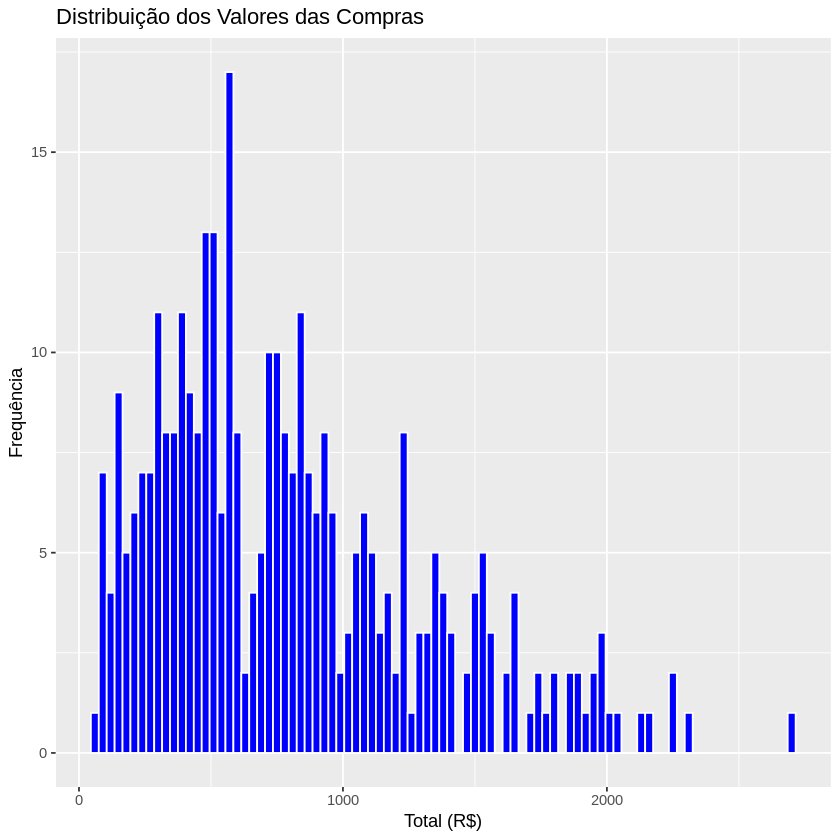

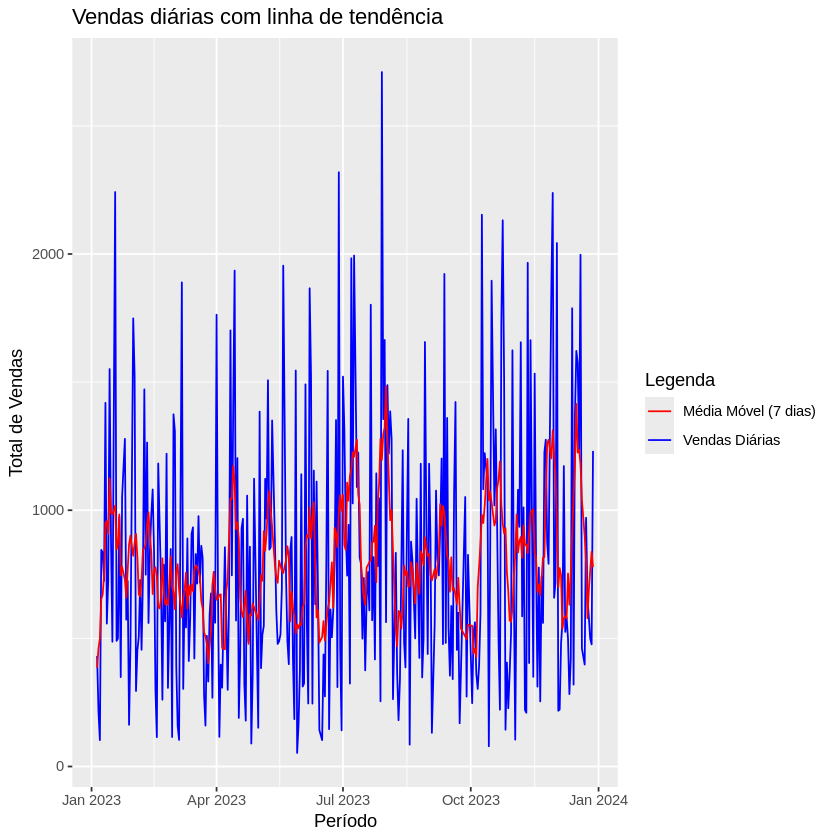

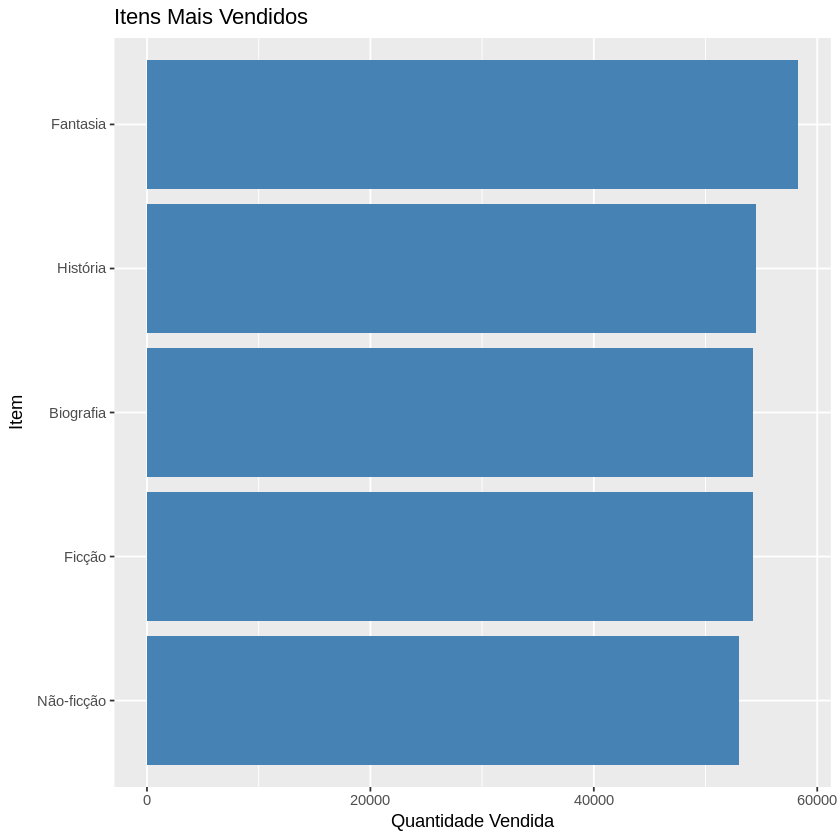

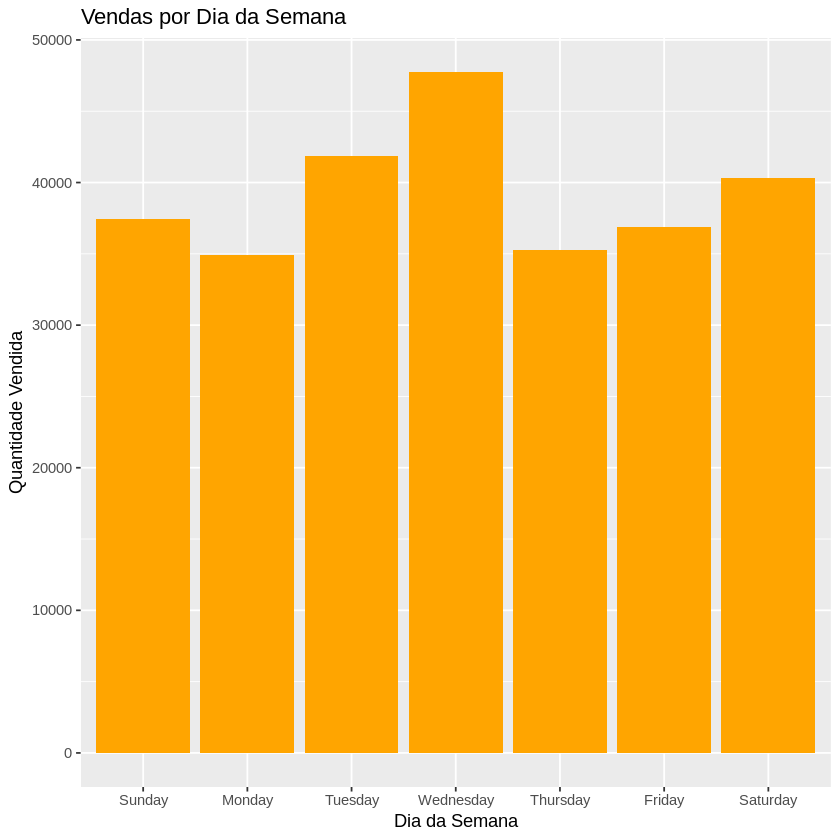

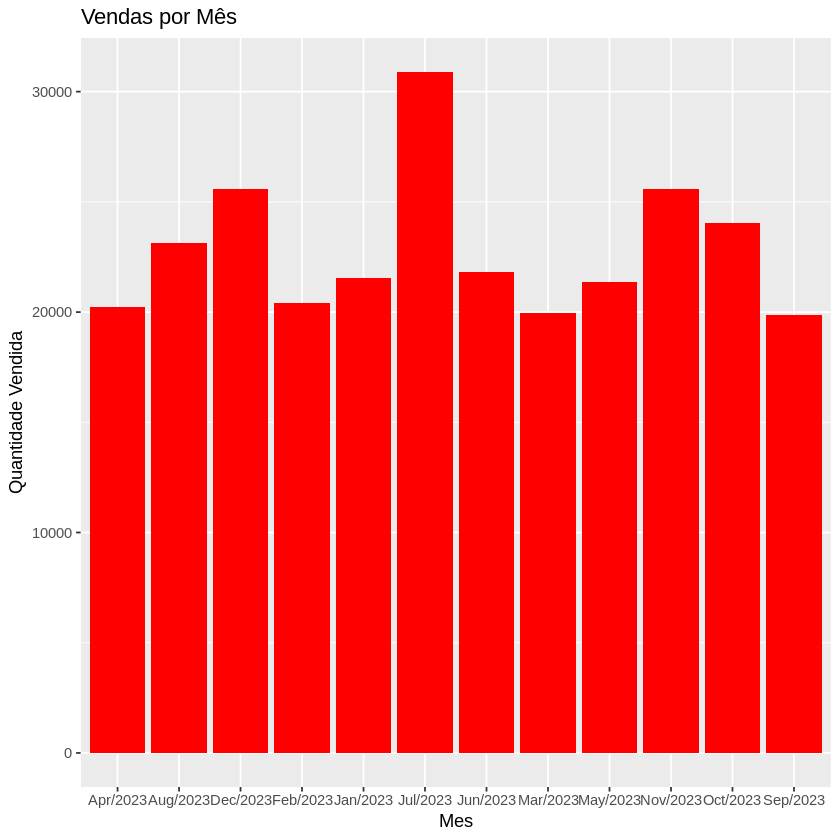

In [ ]:
# 4. Visualizações

# Soma das vendas por data
df_agregado <- df %>%
  group_by(Data) %>%
  summarise(Total_Diario = sum(Total))

# Criar a série temporal
serie_temporal <- ts(df_agregado$Total_Diario, frequency = 365) # Frequência anual

# Calcula a média móvel
media_movel <- ma(serie_temporal, order = 7) # Média móvel de 7 dias

# Cria um dataframe para o gráfico
df_plot <- data.frame(
  Data = df_agregado$Data,
  Vendas = df_agregado$Total_Diario,
  Media_Movel = media_movel
)

# Remove valores NA
df_plot <- df_plot %>%
  na.omit()

# 4.1 Criar o Histograma
ggplot(df_agregado, aes(x = Total_Diario)) +
  geom_histogram(binwidth = 30, fill = "blue", color = "white") +
  labs(title = "Distribuição dos Valores das Compras", x = "Total (R$)", y = "Frequência")

#-------------------------------------------------------------------------------------------------------------------

# 4.2 Gráfico da série temporal com a linha de tendência
ggplot(df_plot, aes(x = Data)) +
  geom_line(aes(y = Vendas, color = "Vendas Diárias")) +
  geom_line(aes(y = Media_Movel, color = "Média Móvel (7 dias)")) +
  labs(title = "Vendas diárias com linha de tendência",
        x = "Período",
        y = "Total de Vendas",
        color = "Legenda") +
  scale_color_manual(values = c("Vendas Diárias" = "blue", "Média Móvel (7 dias)" = "red"))

#-------------------------------------------------------------------------------------------------------------------

# 4.3 Itens Mais Vendidos (Barras Horizontais)
itens_mais_vendidos <- df %>%
  group_by(Item) %>%
  summarise(Total_Vendido = sum(Total)) %>%
  arrange(Total_Vendido)

ggplot(itens_mais_vendidos, aes(x = reorder(Item, Total_Vendido), y = Total_Vendido)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Itens Mais Vendidos", x = "Item", y = "Quantidade Vendida") +
  coord_flip()

#-------------------------------------------------------------------------------------------------------------------

# 4.4	Vendas por dia da semana
df_dia_semana <- df %>%
  mutate(Dia_Semana = wday(Data, label = TRUE, abbr = FALSE)) %>%  # dias como 'segunda-feira', 'terça-feira' etc.
  group_by(Dia_Semana) %>%
  summarise(Total_Vendido = sum(Total))

ggplot(df_dia_semana, aes(x = Dia_Semana, y = Total_Vendido)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Vendas por Dia da Semana", x = "Dia da Semana", y = "Quantidade Vendida")

#-------------------------------------------------------------------------------------------------------------------

# 4.5 Vendas por mês
df_mes <- df %>%
  mutate(Mes = month(Data),
         Ano = year(Data),
         MesAno = paste(month(Data, label = TRUE), year(Data), sep = "/")
         ) %>%
  group_by(Ano,Mes,MesAno) %>%
  summarise(Total_Vendido = sum(Total), .groups ="drop" ) %>%
  arrange(Ano,Mes)

#head(df_mes)

ggplot(df_mes, aes(x = MesAno, y = Total_Vendido)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Vendas por Mês", x = "Mes", y = "Quantidade Vendida")